# Imports

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Generating a synthetic dataset

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniform distribution between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1]) # implements y = cos(2x_1) + cos(3x_2)

# Plotting data

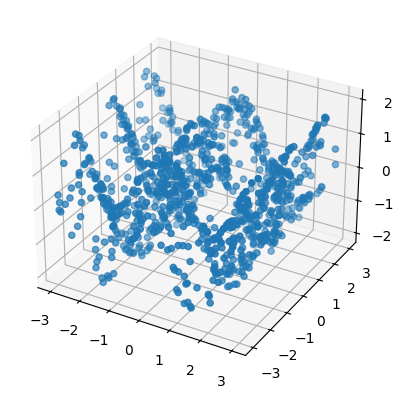

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

# Model Building

In [5]:
# Model design
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
# Training

def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # To Store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zeroing parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and Optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)




Epoch 50/1000, Train Loss: 0.5898
Epoch 100/1000, Train Loss: 0.3512
Epoch 150/1000, Train Loss: 0.2553
Epoch 200/1000, Train Loss: 0.1491
Epoch 250/1000, Train Loss: 0.0700
Epoch 300/1000, Train Loss: 0.0314
Epoch 350/1000, Train Loss: 0.0145
Epoch 400/1000, Train Loss: 0.0093
Epoch 450/1000, Train Loss: 0.0060
Epoch 500/1000, Train Loss: 0.0125
Epoch 550/1000, Train Loss: 0.0040
Epoch 600/1000, Train Loss: 0.0035
Epoch 650/1000, Train Loss: 0.0069
Epoch 700/1000, Train Loss: 0.0030
Epoch 750/1000, Train Loss: 0.0085
Epoch 800/1000, Train Loss: 0.0024
Epoch 850/1000, Train Loss: 0.0022
Epoch 900/1000, Train Loss: 0.0202
Epoch 950/1000, Train Loss: 0.0020
Epoch 1000/1000, Train Loss: 0.0019


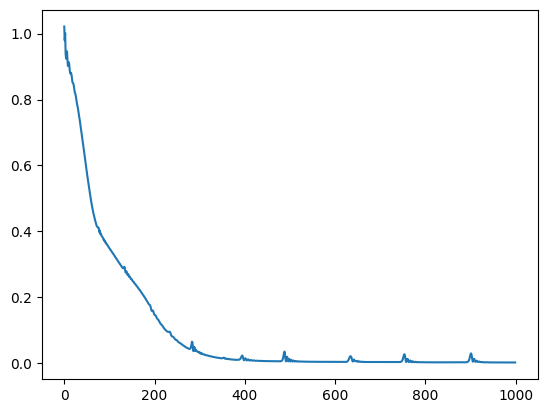

In [13]:
plt.plot(train_losses)

# Plotting Prediction Surface

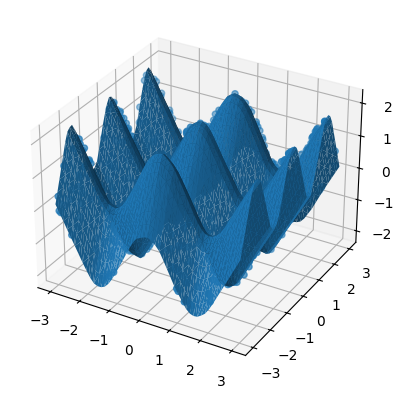

In [14]:
# Prediction Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()


# Understanding if the neural network can extrapolate

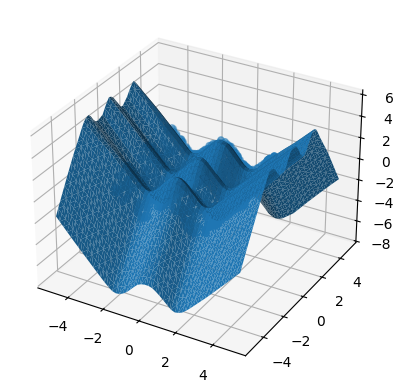

In [15]:
# Prediction Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()


#💡Inference:
- It appears that trying to extraploate does not quite work
- It just extends as upward on both sides
- The reason is the neural network does not use a periodic activation function